In [1]:
import numpy as np                   # Data manipulation
import pandas as pd                  # DataFrame manipulation
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
file = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv"
df = pd.read_csv(file, sep=",", encoding='cp1252')
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1959,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417803e+10,7.549238e+10,8.247091e+10,1.040000e+11,1.150000e+11,1.250000e+11,1.270000e+11,1.030000e+11,9.533511e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN


In [3]:
df = df[["Country Name", "2015", "2016"]]

In [4]:
df.head()

,Country Name,2015,2016
0,Aruba,NaN,NaN
1,Afghanistan,1.921556e+10,1.946902e+10
2,Angola,1.030000e+11,9.533511e+10
3,Albania,1.133526e+10,1.186387e+10
4,Andorra,2.811489e+09,2.858518e+09


In [5]:
GDP=df.fillna(value=0)
df.head()

,Country Name,2015,2016
0,Aruba,NaN,NaN
1,Afghanistan,1.921556e+10,1.946902e+10
2,Angola,1.030000e+11,9.533511e+10
3,Albania,1.133526e+10,1.186387e+10
4,Andorra,2.811489e+09,2.858518e+09


In [6]:
file2 = "happiness.csv"
df2= pd.read_csv(file2)

In [7]:
df2.head()

,Unnamed: 0,Country Name,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,GDP(billions) 2015,"GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,CPI 2015,CPI 2016
0,0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,79.905308,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,100.617575,100.180283
1,1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,60.517529,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,239.815158,243.876225
2,2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,53.596275,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,100.000000,100.250000
3,3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,70.853585,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,100.000000,103.550000
4,4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,42.465655,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,126.566667,128.375000


In [8]:
happiness = df2[["Country Name", "Happiness Rank 2015", "Happiness Rank 2016", "Happiness Score 2015", "Happiness Score 2016"]]
happiness.head()


,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016
0,Switzerland,1,2,7.587,7.509
1,Iceland,2,3,7.561,7.501
2,Denmark,3,1,7.527,7.526
3,Norway,4,4,7.522,7.498
4,Canada,5,6,7.427,7.404


In [9]:
Final_happiness = pd.merge(happiness, GDP, on="Country Name", how = "inner")
Final_happiness

,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016,2015,2016
0,Switzerland,1,2,7.587,7.509,6.790000e+11,6.690000e+11
1,Iceland,2,3,7.561,7.501,1.694225e+10,2.030410e+10
2,Denmark,3,1,7.527,7.526,3.010000e+11,3.070000e+11
3,Norway,4,4,7.522,7.498,3.870000e+11,3.710000e+11
4,Canada,5,6,7.427,7.404,1.560000e+12,1.540000e+12
5,Netherlands,7,7,7.378,7.339,7.580000e+11,7.770000e+11
6,Sweden,8,10,7.364,7.291,4.980000e+11,5.140000e+11
7,New Zealand,9,8,7.286,7.334,1.760000e+11,1.850000e+11
8,Australia,10,9,7.284,7.313,1.350000e+12,1.200000e+12
9,Israel,11,11,7.278,7.267,2.990000e+11,3.180000e+11


In [10]:
file3 = "API_SP.POP.TOTL_DS2_en_csv_v2.csv"
population = pd.read_csv(file3, sep=",", encoding='cp1252', header =2)
population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,5.421100e+04,5.543800e+04,5.622500e+04,5.669500e+04,5.703200e+04,5.736000e+04,...,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8.996351e+06,9.166764e+06,9.345868e+06,9.533954e+06,9.731361e+06,9.938414e+06,...,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5.643182e+06,5.753024e+06,5.866061e+06,5.980417e+06,6.093321e+06,6.203299e+06,...,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07,2.881346e+07,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1.608800e+06,1.659800e+06,1.711319e+06,1.762621e+06,1.814135e+06,1.864791e+06,...,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06,2.876101e+06,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,1.341100e+04,1.437500e+04,1.537000e+04,1.641200e+04,1.746900e+04,1.854900e+04,...,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04,7.728100e+04,NaN,NaN
5,Arab World,ARB,"Population, total",SP.POP.TOTL,9.249093e+07,9.504450e+07,9.768229e+07,1.004111e+08,1.032399e+08,1.061750e+08,...,3.481451e+08,3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,NaN,NaN
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,9.263400e+04,1.010780e+05,1.124720e+05,1.255660e+05,1.385290e+05,1.503620e+05,...,7.666393e+06,8.270684e+06,8.672475e+06,8.900453e+06,9.006263e+06,9.070867e+06,9.154302e+06,9.269612e+06,NaN,NaN
7,Argentina,ARG,"Population, total",SP.POP.TOTL,2.061908e+07,2.095308e+07,2.128768e+07,2.162184e+07,2.195393e+07,2.228339e+07,...,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07,4.384743e+07,NaN,NaN
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1.874120e+06,1.941491e+06,2.009526e+06,2.077575e+06,2.144998e+06,2.211316e+06,...,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06,2.924816e+06,NaN,NaN
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,2.001300e+04,2.048600e+04,2.111700e+04,2.188200e+04,2.269800e+04,2.352000e+04,...,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04,5.559900e+04,NaN,NaN


In [11]:
population = population[["Country Name", "2015", "2016"]]
population.head()

,Country Name,2015,2016
0,Aruba,104341.0,104822.0
1,Afghanistan,33736494.0,34656032.0
2,Angola,27859305.0,28813463.0
3,Albania,2880703.0,2876101.0
4,Andorra,78014.0,77281.0


In [12]:
Final_happiness = pd.merge(Final_happiness, population, on="Country Name", how = "inner")
Final_happiness.head()

,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016,2015_x,2016_x,2015_y,2016_y
0,Switzerland,1,2,7.587,7.509,6.790000e+11,6.690000e+11,8282396.0,8372413.0
1,Iceland,2,3,7.561,7.501,1.694225e+10,2.030410e+10,330815.0,335439.0
2,Denmark,3,1,7.527,7.526,3.010000e+11,3.070000e+11,5683483.0,5728010.0
3,Norway,4,4,7.522,7.498,3.870000e+11,3.710000e+11,5190239.0,5236151.0
4,Canada,5,6,7.427,7.404,1.560000e+12,1.540000e+12,35832513.0,36264604.0


In [13]:
Final_happiness = Final_happiness.rename(columns = {"2015_x":"GDP 2015", "2016_x": "GDP 2016", "2015_y":"Population 2015", "2016_y":"Population 2016"})
Final_happiness.head()

,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016,GDP 2015,GDP 2016,Population 2015,Population 2016
0,Switzerland,1,2,7.587,7.509,6.790000e+11,6.690000e+11,8282396.0,8372413.0
1,Iceland,2,3,7.561,7.501,1.694225e+10,2.030410e+10,330815.0,335439.0
2,Denmark,3,1,7.527,7.526,3.010000e+11,3.070000e+11,5683483.0,5728010.0
3,Norway,4,4,7.522,7.498,3.870000e+11,3.710000e+11,5190239.0,5236151.0
4,Canada,5,6,7.427,7.404,1.560000e+12,1.540000e+12,35832513.0,36264604.0


In [14]:
Final_happiness['GDP Per capita 2015'] = Final_happiness['GDP 2015']/Final_happiness['Population 2015']
Final_happiness['GDP per capita 2016'] = Final_happiness['GDP 2016']/Final_happiness['Population 2016']
Final_happiness

,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016,GDP 2015,GDP 2016,Population 2015,Population 2016,GDP Per capita 2015,GDP per capita 2016
0,Switzerland,1,2,7.587,7.509,6.790000e+11,6.690000e+11,8.282396e+06,8.372413e+06,81981.107882,79905.279398
1,Iceland,2,3,7.561,7.501,1.694225e+10,2.030410e+10,3.308150e+05,3.354390e+05,51213.661333,60529.926756
2,Denmark,3,1,7.527,7.526,3.010000e+11,3.070000e+11,5.683483e+06,5.728010e+06,52960.482155,53596.275146
3,Norway,4,4,7.522,7.498,3.870000e+11,3.710000e+11,5.190239e+06,5.236151e+06,74563.040353,70853.571641
4,Canada,5,6,7.427,7.404,1.560000e+12,1.540000e+12,3.583251e+07,3.626460e+07,43535.880389,42465.650528
5,Netherlands,7,7,7.378,7.339,7.580000e+11,7.770000e+11,1.693992e+07,1.703031e+07,44746.366321,45624.525772
6,Sweden,8,10,7.364,7.291,4.980000e+11,5.140000e+11,9.799186e+06,9.923085e+06,50820.547748,51798.407451
7,New Zealand,9,8,7.286,7.334,1.760000e+11,1.850000e+11,4.595700e+06,4.693200e+06,38296.668625,39418.733487
8,Australia,10,9,7.284,7.313,1.350000e+12,1.200000e+12,2.385078e+07,2.421081e+07,56601.912960,49564.638670
9,Israel,11,11,7.278,7.267,2.990000e+11,3.180000e+11,8.380100e+06,8.546000e+06,35679.765158,37210.390826


In [15]:
file4 = "final_cpi_data.csv"
cpi = pd.read_csv(file4)
cpi.head()

,Unnamed: 0,Country Name,Indicator Name,Attribute,2014,2015,2016
0,28,Brazil,"Consumer Price Index, All items",Value,3953.157500,4310.120000,4686.786917
1,49,France,"Consumer Price Index, All items",Value,99.961667,99.999167,100.182500
2,216,Bulgaria,"Consumer Price Index, All items",Value,6557.267697,6550.406614,6498.085301
3,421,Colombia,"Consumer Price Index, All items",Value,116.754167,122.580000,131.790000
4,475,Canada,"Consumer Price Index, All items",Value,125.158333,126.566667,128.375000


In [16]:
cpi = cpi[["Country Name", "2015", "2016"]]
cpi.head()

,Country Name,2015,2016
0,Brazil,4310.120000,4686.786917
1,France,99.999167,100.182500
2,Bulgaria,6550.406614,6498.085301
3,Colombia,122.580000,131.790000
4,Canada,126.566667,128.375000


In [17]:
Final_happiness =  pd.merge(Final_happiness, cpi, on="Country Name", how = "inner")
Final_happiness.head()

,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016,GDP 2015,GDP 2016,Population 2015,Population 2016,GDP Per capita 2015,GDP per capita 2016,2015,2016
0,Switzerland,1,2,7.587,7.509,6.790000e+11,6.690000e+11,8282396.0,8372413.0,81981.107882,79905.279398,100.617575,100.180283
1,Iceland,2,3,7.561,7.501,1.694225e+10,2.030410e+10,330815.0,335439.0,51213.661333,60529.926756,239.815158,243.876225
2,Denmark,3,1,7.527,7.526,3.010000e+11,3.070000e+11,5683483.0,5728010.0,52960.482155,53596.275146,100.000000,100.250000
3,Norway,4,4,7.522,7.498,3.870000e+11,3.710000e+11,5190239.0,5236151.0,74563.040353,70853.571641,100.000000,103.550000
4,Canada,5,6,7.427,7.404,1.560000e+12,1.540000e+12,35832513.0,36264604.0,43535.880389,42465.650528,126.566667,128.375000


In [18]:
Final_happiness = Final_happiness.rename(columns = {"2015":"CPI 2015", "2016":"CPI 2016"})
Final_happiness.head()

,Country Name,Happiness Rank 2015,Happiness Rank 2016,Happiness Score 2015,Happiness Score 2016,GDP 2015,GDP 2016,Population 2015,Population 2016,GDP Per capita 2015,GDP per capita 2016,CPI 2015,CPI 2016
0,Switzerland,1,2,7.587,7.509,6.790000e+11,6.690000e+11,8282396.0,8372413.0,81981.107882,79905.279398,100.617575,100.180283
1,Iceland,2,3,7.561,7.501,1.694225e+10,2.030410e+10,330815.0,335439.0,51213.661333,60529.926756,239.815158,243.876225
2,Denmark,3,1,7.527,7.526,3.010000e+11,3.070000e+11,5683483.0,5728010.0,52960.482155,53596.275146,100.000000,100.250000
3,Norway,4,4,7.522,7.498,3.870000e+11,3.710000e+11,5190239.0,5236151.0,74563.040353,70853.571641,100.000000,103.550000
4,Canada,5,6,7.427,7.404,1.560000e+12,1.540000e+12,35832513.0,36264604.0,43535.880389,42465.650528,126.566667,128.375000


In [19]:
Final_happiness.to_csv("FinalHappiness.csv")

In [22]:
data = dict(type = 'choropleth', 
           locations = Final_happiness['Country Name'],
           locationmode = 'country names',
           z = Final_happiness['GDP per capita 2016'], 
           text = Final_happiness['Country Name'],
           colorbar = {'title':'GDI in Thousands of Dollars'})
layout = dict(title = 'GDI Visualization', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [45]:
data = dict(type = 'choropleth', 
           locations = Final_happiness['Country Name'],
           locationmode = 'country names',
           z = Final_happiness['GDP 2016'], 
           text = Final_happiness['Country Name'],
           colorbar = {'title':'GDP in Trillions'})
layout = dict(title = 'GDP Visualization', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)


iplot(choromap3)

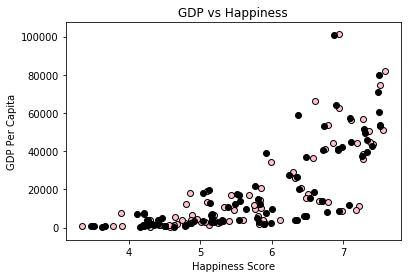

In [38]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(Final_happiness['Happiness Score 2015'], Final_happiness['GDP Per capita 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(Final_happiness['Happiness Score 2016'], Final_happiness['GDP per capita 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.savefig('GDP_per_cap_vs_Happiness.png')
plt.xlabel('Happiness Score')
plt.ylabel('GDP Per Capita')
plt.title("GDP vs Happiness")

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()

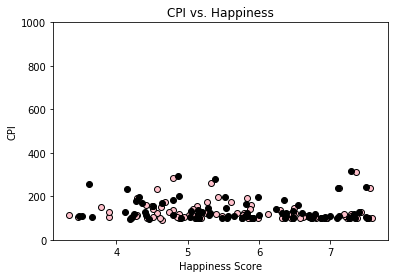

In [49]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(Final_happiness['Happiness Score 2015'], Final_happiness['CPI 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(Final_happiness['Happiness Score 2016'], Final_happiness['CPI 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.savefig('CPI_vs_Happiness.png')
plt.xlabel('Happiness Score')
plt.ylabel('CPI')
plt.title("CPI vs. Happiness")
plt.ylim(0,1000)

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()

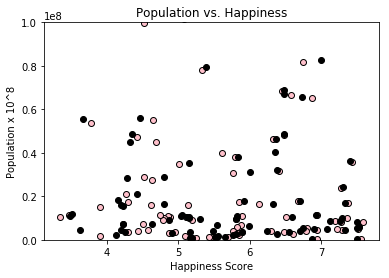

In [52]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(Final_happiness['Happiness Score 2015'], Final_happiness['Population 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(Final_happiness['Happiness Score 2016'], Final_happiness['Population 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.savefig('Population_vs_Happiness.png')
plt.xlabel('Happiness Score')
plt.ylabel('Population x 10^8')
plt.title("Population vs. Happiness")
plt.ylim(0,100000000)

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()

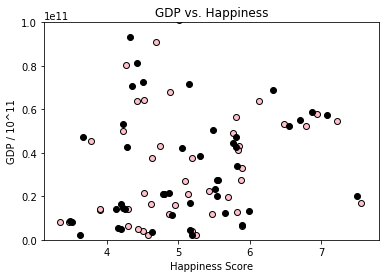

In [47]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(Final_happiness['Happiness Score 2015'], Final_happiness['GDP 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(Final_happiness['Happiness Score 2016'], Final_happiness['GDP 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.savefig('GDP_vs_Happiness.png')
plt.xlabel('Happiness Score')
plt.ylabel('GDP / 10^11')
plt.title("GDP vs. Happiness")
plt.ylim(0,100000000000)

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()